In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential,preprocessing

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [1]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount = True)

Mounted at /content/gdrive


In [3]:
%cd "gdrive/MyDrive/Project"

/content/gdrive/MyDrive/Project


In [ ]:
%ls 

Final.h5  Test/  Train/  Validation/


In [ ]:
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D,Dense
model=Sequential() 

model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same' ,input_shape=(150,150,3)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(15,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                    

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,zoom_range = 0.2,horizontal_flip = True)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/gdrive/MyDrive/Project/Train',target_size = (150,150),batch_size = 32,class_mode =  'categorical')

Found 1050 images belonging to 15 classes.


In [ ]:
training_set.class_indices

{'Gạo 64 Long An': 0,
 'Gạo Hàm Châu Siêu': 1,
 'Gạo Hương Lài Miên': 2,
 'Gạo Hương Sen': 3,
 'Gạo Jasmine': 4,
 'Gạo Nàng Hoa Sữa': 5,
 'Gạo Nàng Hương': 6,
 'Gạo Nếp Bắc': 7,
 'Gạo Nếp Ngỗng': 8,
 'Gạo ST25': 9,
 'Gạo Sari': 10,
 'Gạo Tám Xoan': 11,
 'Gạo Tấm ST25': 12,
 'Gạo Thơm Lài': 13,
 'Gạo Thơm Thái': 14}

In [ ]:
test_set = train_datagen.flow_from_directory('/content/gdrive/MyDrive/Project/Test',target_size = (150,150),batch_size = 32,class_mode =  'categorical')

Found 450 images belonging to 15 classes.


In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(training_set,epochs=150,batch_size=128,verbose=1, validation_data=test_set, callbacks=[EarlyStopping(monitor='val_loss', patience=20)])

Epoch 1/150
33/33 [==============================] - 1178s 36s/step - loss: 3.3520 - accuracy: 0.0752 - val_loss: 2.6736 - val_accuracy: 0.0978
Epoch 2/150
33/33 [==============================] - 231s 7s/step - loss: 2.6098 - accuracy: 0.0924 - val_loss: 2.5212 - val_accuracy: 0.1400
Epoch 3/150
33/33 [==============================] - 228s 7s/step - loss: 2.4875 - accuracy: 0.1305 - val_loss: 2.4016 - val_accuracy: 0.1800
Epoch 4/150
33/33 [==============================] - 228s 7s/step - loss: 2.5060 - accuracy: 0.1267 - val_loss: 2.5534 - val_accuracy: 0.1400
Epoch 5/150
33/33 [==============================] - 227s 7s/step - loss: 2.4379 - accuracy: 0.1581 - val_loss: 2.3749 - val_accuracy: 0.1822
Epoch 6/150
33/33 [==============================] - 228s 7s/step - loss: 2.3189 - accuracy: 0.1838 - val_loss: 2.2426 - val_accuracy: 0.2067
Epoch 7/150
33/33 [==============================] - 227s 7s/step - loss: 2.3120 - accuracy: 0.1810 - val_loss: 2.2268 - val_accuracy: 0.1822
Epoc

In [4]:
from keras.models import load_model
#model.save('Final.h5')
model_CNN = load_model('Final.h5')

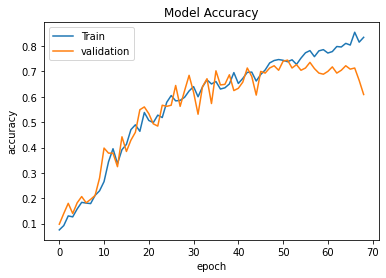

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','validation'],loc='upper left')
plt.show()

In [ ]:
Score=model.evaluate(training_set,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.6947162747383118
Train Accuracy 0.7342857122421265


Gạo Tám Xoan


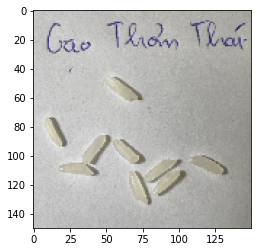

Gạo Nếp Bắc


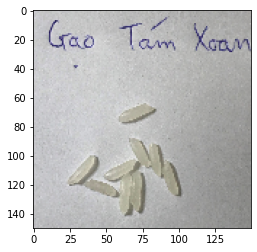

Gạo Nếp Bắc


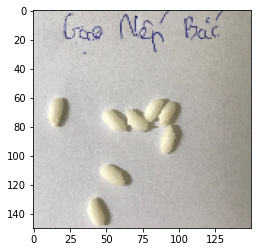

Gạo Tấm ST25


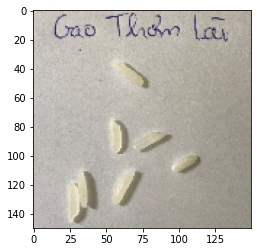

Gạo Thơm Thái


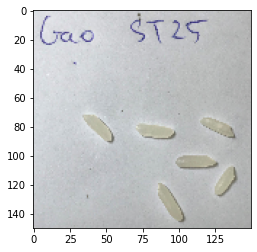

Gạo Tấm ST25


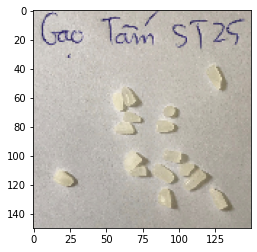

Gạo Jasmine


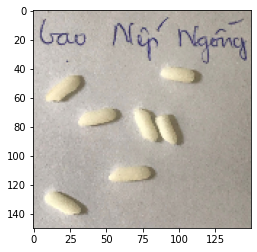

Gạo Nàng Hương


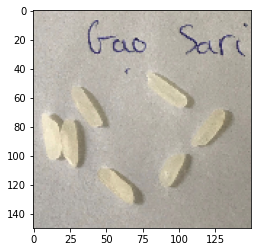

Gạo Tấm ST25


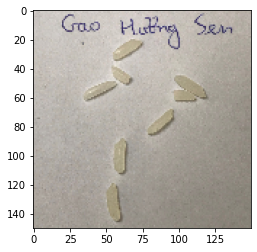

Gạo Tấm ST25


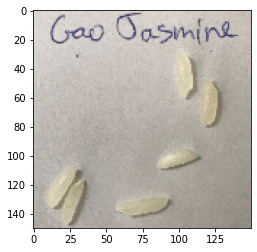

Gạo Nàng Hương


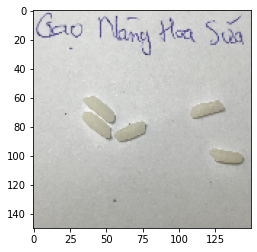

Gạo Nếp Bắc


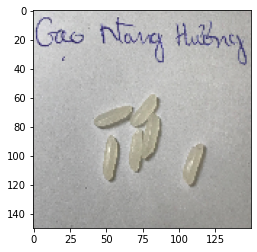

Gạo Thơm Thái


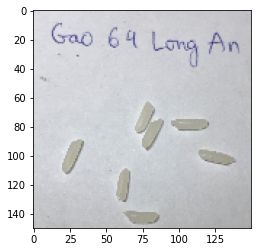

Gạo Thơm Thái


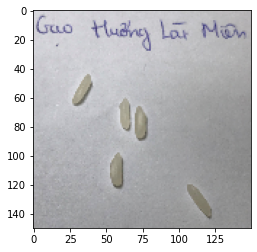

Gạo Thơm Thái


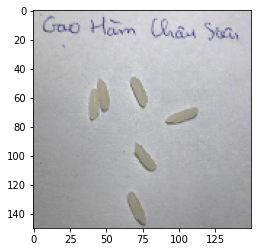

In [7]:
import os
import numpy as np
from tensorflow.keras.utils import load_img, img_to_array
import matplotlib.pyplot as plt
test="/content/gdrive/MyDrive/Project/Validation/"

for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=model_CNN.predict(img)
  if round(result[0][0])==1:
    prediction='Gạo 64 Long An'
  if round(result[0][1])==1:
    prediction='Gạo Hàm Châu Siêu'
  if round(result[0][2])==1:
    prediction='Gạo Hương lài Miên'
  if round(result[0][3])==1:
    prediction='Gạo Tấm ST25' 
  if round(result[0][4])==1:
    prediction='Gạo Jasmine'
  if round(result[0][5])==1:
    prediction='Gạo Nàng Hoa Sữa'
  if round(result[0][6])==1:
    prediction='Gạo Nàng Hương'
  if round(result[0][7])==1:
    prediction='Gạo Nếp Bắc'
  if round(result[0][8])==1:
    prediction='Gạo Nếp Ngỗng' 
  if round(result[0][9])==1:
    prediction='Gạo Sari'
  if round(result[0][10])==1:
    prediction='Gạo ST25'
  if round(result[0][11])==1:
    prediction='Gạo Tám Xoan'
  if round(result[0][12])==1:
    prediction='Gạo Tấm ST25'
  if round(result[0][13])==1:
    prediction='Gạo Thơm Lài'
  if round(result[0][14])==1:
    prediction='Gạo Thơm Thái'

  print(prediction)
  plt.show()